In [ ]:
import tensorflow as tf
from keras import layers, models
from keras.callbacks import TensorBoard
from time import time
import os
from PIL import Image
import numpy as np
# 0. 필요한 라이브러리 import

# import numpy as np
import tensorflow as tf
from keras import layers, models
from keras.callbacks import TensorBoard
from time import time
import os
from PIL import Image
import numpy as np
import tensorflow as tf
import numpy as np;
import os
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Input, Dense, Activation
from tensorflow.keras.optimizers import SGD, Adam
import tensorflow as tf
from keras import layers, models
from keras.callbacks import TensorBoard
from time import time
import os
from PIL import Image
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.preprocessing import LabelEncoder
import random
import glob
from PIL import Image
import PIL.ImageOps
import shutil
import albumentations as A

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


기존 마리오 와리오 폴더 있는 경로

In [ ]:
original = '/content/drive/MyDrive/competition_data/mario'

In [ ]:
original_dataset_dir1 = '/content/drive/MyDrive/competition_data/mario'
original_dataset_dir2 = '/content/drive/MyDrive/competition_data/wario' 

새로운 데이터가 저장 될 폴더 생성

In [ ]:
base = os.path.join(original,'new')
os.mkdir(base)

In [ ]:
base_dir = '/content/drive/MyDrive/new'

In [ ]:
mario_dir = os.path.join(base_dir, 'mario')
os.mkdir(mario_dir)
wario_dir = os.path.join(base_dir, 'wario')
os.mkdir(wario_dir)


In [ ]:
fnames = ['mario_{}.jpg'.format(i) for i in range(5000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir1, fname)
    dst = os.path.join(mario_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['wario_{}.jpg'.format(i) for i in range(5000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir1, fname)
    dst = os.path.join(wario_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
def load_data(data_root):
    
    file_paths=[]
    labels=[]
    x_data=[]
    y_data=[]

    for filename in os.listdir(data_root):
        file_paths.append(os.path.join(data_root,filename))
        labels.append(os.path.basename(data_root))#filename.split('_')[0]

    for file in file_paths:
        image = Image.open(file)
        image = image.convert('L') #'L': greyscale, '1': 이진화, 'RGB' , 'RGBA', 'CMYK' #색상 모드 변경
        image = np.array(image) #이미지 타입을 넘파이 타입으로 변환
        x_data.append(image)

    x_data = np.array(x_data)
    y_data = np.array(labels)
    return x_data, y_data

In [ ]:
categories = ['mario', 'wario']

categories = ['mario']
for category in categories:
  file_path = '/content/drive/MyDrive/new/' + category + '/'
  file_names = os.listdir(file_path)
  total_origin_image_num = len(file_names)                                   
  augment_cntll = 0
  for i in range(0, total_origin_image_num):
    change_picture_index = i

    file_name = file_names[change_picture_index]
    
    origin_image_path = '/content/drive/MyDrive/new/' + category + '/' + file_name
    print(origin_image_path)
    image = Image.open(origin_image_path)

      #이미지 좌우 반전
    print("invert")
    inverted_image = image.transpose(Image.FLIP_LEFT_RIGHT)
    inverted_image.save(file_path + 'inverted_' + str(augment_cntll) + '.jpg')


      # 이미지 상하 반전
    print('updown')
    updown_image = image.transpose(Image.FLIP_TOP_BOTTOM)
    updown_image.save(file_path + 'updown_' + str(augment_cntll) + '.jpg')
        

      #이미지 기울이기
    print("rotate")
    rotated_image = image.rotate(random.randrange(-20, 20))
    rotated_image.save(file_path + 'rotated_' + str(augment_cntll) + '.jpg')


      #노이즈 추가하기
    # img = cv2.imread(origin_image_path)
    # print("noise")
    # row,col,ch= img.shape
    # mean = 0
    # var = 0.1
    # sigma = var**0.5
    # gauss = np.random.normal(mean,sigma,(row,col,ch))
    # gauss = gauss.reshape(row,col,ch)
    # noisy_array = img + gauss
    # noisy_image = Image.fromarray(np.uint8(noisy_array))#.convert('L')
    image1 = np.array(image)
    transform = A.GaussNoise(always_apply=True)
    
    transformed = transform(image=image1)
    transformed_image = transformed['image']
    transformed_image = Image.fromarray(np.uint8(transformed_image))
    transformed_image.save(file_path + 'noiseAdded_' + str(augment_cntll) + '.jpg')

    # aug_cut = A.Cutout(p=1, num_holes=8, max_h_size=24, max_w_size=24)
    # cutout_image = aug_cut(image = image)
    # cutout_image.save(file_path + 'cutoutAdded_' + str(augment_cntll) + '.jpg')

    aug_clahe = A.CLAHE(always_apply=True)
    clache_imaged = aug_clahe(image = image1)
    clache_imageeded = clache_imaged['image']
    clache_imageeded = Image.fromarray(np.uint8(clache_imageeded))
    clache_imageeded.save(file_path + 'claheAdded_' + str(augment_cntll) + '.jpg')

    # aug_blur = A.Blur(always_apply=True,p=1, blur_limit=(50, 60))
    # aug_blurimg = aug_blur(image=image1)
    # aug_blurimg = aug_blurimg['image']
    # aug_blurimg = Image.fromarray(np.uint8(aug_blurimg))

    # aug_blurimg.save(file_path + 'blurAdded_' + str(augment_cntll) + '.jpg')


    aug_down=A.Downscale(always_apply=True, p=0.5, scale_min=0.699999988079071, scale_max=0.9900000095367432, interpolation=2)
    aug_downed = aug_down(image=image1)
    aug_downeded = aug_downed['image']
    aug_downeded = Image.fromarray(np.uint8(aug_downeded))
    aug_downeded.save(file_path + 'downAdded_' + str(augment_cntll) + '.jpg')

    aug_els = A.ElasticTransform(always_apply=True, p=0.5, alpha=0.20000000298023224, sigma=3.359999895095825, alpha_affine=2.009999990463257, interpolation=1, border_mode=1, value=(0, 0, 0), mask_value=None, approximate=False)
    aug_elsed = aug_els(image = image1)
    aug_elseded = aug_elsed['image']
    aug_elseded = Image.fromarray(np.uint8(aug_elseded))
    aug_elseded.save(file_path + 'augels_' + str(augment_cntll) + '.jpg')

    aug_iso = A.ISONoise(always_apply=True, p=0.5, intensity=(0.05000000074505806, 0.12999999523162842), color_shift=(0.009999999776482582, 0.26999998092651367))
    aug_isoed = aug_iso(image = image1)
    aug_isoeded = aug_isoed['image']
    aug_isoeded = Image.fromarray(np.uint8(aug_isoeded))
    aug_isoeded.save(file_path + 'isoAdded_' + str(augment_cntll) + '.jpg')

    aug_equ = A.Equalize(always_apply=True, p=0.2, mode='cv', by_channels=False)
    aug_equed = aug_equ(image = image1)
    aug_equeded = aug_equed['image']
    aug_equeded = Image.fromarray(np.uint8(aug_equeded))
    aug_equeded.save(file_path + 'eqAdded_' + str(augment_cntll) + '.jpg')
    augment_cntll += 1

In [ ]:
!unzip -qq "/content/drive/MyDrive/train.zip" #데이터 압축풀기

warning [/content/drive/MyDrive/train.zip]:  76 extra bytes at beginning or within zipfile
  (attempting to process anyway)
error [/content/drive/MyDrive/train.zip]:  reported length of central directory is
  -76 bytes too long (Atari STZip zipfile?  J.H.Holm ZIPSPLIT 1.1
  zipfile?).  Compensating...
error:  expected central file header signature not found (file #100003).
  (please check that you have transferred or created the zipfile in the
  appropriate BINARY mode and that you have compiled UnZip properly)


In [ ]:
mario_root=r'train/mario'#마리오 데이터셋
wario_root=r'train/wario'#와리오 데이터 셋

In [ ]:

def load_data(data_root):
    
    file_paths=[]
    labels=[]
    x_data=[]
    y_data=[]

    for filename in os.listdir(data_root):
        file_paths.append(os.path.join(data_root,filename))
        labels.append(os.path.basename(data_root))

    for file in file_paths:
        image = Image.open(file)
        image = image.convert('L') #'L': greyscale, '1': 이진화, 'RGB' , 'RGBA', 'CMYK' #색상 모드 변경
        image = np.array(image) #이미지 타입을 넘파이 타입으로 변환
        x_data.append(image)

    x_data = np.array(x_data)
    y_data = np.array(labels)
    return x_data, y_data

In [ ]:
x_mario, y_mario = load_data(mario_root)
x_wario, y_wario = load_data(wario_root)

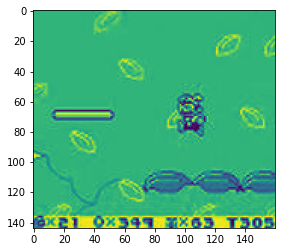

mario


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_mario[0])
plt.show()
print(y_mario[0])

In [ ]:
x_data = np.concatenate([x_mario, x_wario])
y_data = np.concatenate([y_mario, y_wario])

print(x_data.shape)
print(y_data.shape)


x_data = x_data.reshape(-1, 144, 160, 1) # 배치 x 높이 x 폭 x 채널
print(x_data.shape)
print(y_data.shape)

(100000, 144, 160)
(100000,)
(100000, 144, 160, 1)
(100000,)


In [ ]:
# 1. 데이터 전처리
from sklearn.model_selection import train_test_split

tf.random.set_seed(1234)

x_train, x_test, y_train, y_test  = train_test_split(x_data, y_data, test_size=0.01, random_state=42)

print(x_test.shape)

(1000, 144, 160, 1)


In [ ]:
# 데이터 리사이즈 
x_train = x_train.reshape(-1, 144, 160, 1)  # 배치 x 높이 x 폭 x 채널
x_test = x_test.reshape(-1, 144, 160, 1)

# 데이터 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

from sklearn.preprocessing import LabelEncoder

# 1. define
LE = LabelEncoder()

# 2. fitting
LE.fit(y_train)

# 3. transform
y_train = LE.transform(y_train)
y_test = LE.transform(y_test)


In [ ]:
# 2. 모델 구성하기

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, Flatten, BatchNormalization, Dropout, LeakyReLU

model = Sequential()

model.add(Conv2D(filters=10, kernel_size=(3, 3), activation=LeakyReLU(alpha=0.2), input_shape=(144,160,1), strides = (1,1), padding = 'same'))
model.add(BatchNormalization())
model.add(AveragePooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(filters=20, kernel_size=(3, 3), activation=LeakyReLU(alpha=0.2), strides = (1,1), padding = 'same'))
model.add(BatchNormalization())
model.add(AveragePooling2D())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(units=120, activation=LeakyReLU(alpha=0.2)))
model.add(Dropout(0.25))
model.add(Dense(units=42, activation=LeakyReLU(alpha=0.2)))
model.add(Dropout(0.25))
model.add(Dense(units=1, activation = 'sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 144, 160, 10)      100       
                                                                 
 batch_normalization (BatchN  (None, 144, 160, 10)     40        
 ormalization)                                                   
                                                                 
 average_pooling2d (AverageP  (None, 72, 80, 10)       0         
 ooling2D)                                                       
                                                                 
 dropout (Dropout)           (None, 72, 80, 10)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 80, 20)        1820      
                                                                 
 batch_normalization_1 (Batc  (None, 72, 80, 20)       8

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
# 4. 모델 학습시키기

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
model.fit(x_train, y_train, epochs = 10, batch_size = 16, validation_split = 0.3 , callbacks=tensorboard)

Epoch 1/10
4332/4332 [==============================] - 44s 9ms/step - loss: 0.0801 - accuracy: 0.9717 - val_loss: 0.1326 - val_accuracy: 0.9672
Epoch 2/10
4332/4332 [==============================] - 39s 9ms/step - loss: 0.0230 - accuracy: 0.9921 - val_loss: 0.0508 - val_accuracy: 0.9831
Epoch 3/10
4332/4332 [==============================] - 39s 9ms/step - loss: 0.0153 - accuracy: 0.9951 - val_loss: 0.2449 - val_accuracy: 0.9571
Epoch 4/10
4332/4332 [==============================] - 39s 9ms/step - loss: 0.0106 - accuracy: 0.9963 - val_loss: 0.0077 - val_accuracy: 0.9977
Epoch 5/10
 581/4332 [===>..........................] - ETA: 29s - loss: 0.0084 - accuracy: 0.9970

KeyboardInterrupt: ignored

In [ ]:
# 5. 학습과정 살펴보기
%load_ext tensorboard
%tensorboard --logdir logs --port=6017

In [ ]:
# 6. 모델 평가하기
result = model.evaluate(x_test, y_test, batch_size = 10)
print('Accuracy : ', result[1] * 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0243 - accuracy: 0.9950
Accuracy :  99.50000047683716


In [ ]:
# 데이터 예측

# 첫번째 데이터의 클래스별 확률값
print(model.predict(x_test)[0])

# 테스트 데이터 예측
y_pred = model.predict(x_test)
a = y_pred
a[a<0.5] = 0
a[a>=0.5] = 1
print("예측결과:" , a)

32/32 [==============================] - 0s 6ms/step
[1.]
32/32 [==============================] - 0s 4ms/step
예측결과: [[1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 

In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,a)
matrix

array([[519,   4],
       [  1, 476]])

In [ ]:
# Accuracy, Precision, Recall, F1

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_test_real = y_test
y_test_hat = a

accuacy = accuracy_score(y_test_real, y_test_hat)
precision = precision_score(y_test_real, y_test_hat, average = "micro")
recall = recall_score(y_test_real, y_test_hat, average = "micro")
f1 = f1_score(y_test_real, y_test_hat, average = "micro")

print("Accuracy :", accuacy.round(3), "precision :", precision.round(3), "Recall :", recall.round(3), "F1 :", f1.round(3) )

Accuracy : 0.995 precision : 0.995 Recall : 0.995 F1 : 0.995


In [ ]:
model.save('2에폭.h5')